In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Power Parameters
h=6.6260700e-34                 #Planck's Constant
kb=1.38064852e-23               #Boltzmann's Constant
c=2.998e8;                          #Light Velocity in vacuum
Tcmb=2.725;                      #CMB Temperature
freq=np.arange(40e9,200e9,1e9); #Frequency vector
emiss=0.5;                      #Emissivity
bwrel=0.3;                       #relative bandwidth 

In [3]:
# Calculations
wav=c/freq;                     #Wavelenght vector
sang=(wav)**2;                  #Solid angle of antenna
B=((2*h*freq**3)/(c**2))*(1/(np.exp((h*freq)/(kb*Tcmb))-1));  #Spectral Radiance
P=emiss*B*sang*bwrel*freq;                                    #Power
Tb=(h*freq/kb)*np.log(1+2*h*freq**3/(B*c**2))                 #brighness temperature
Tbx=(h*freq/kb)*np.log(1+2*h*freq**3/((P/(emiss*sang*bwrel*freq))*c**2))                 #brighness temperature

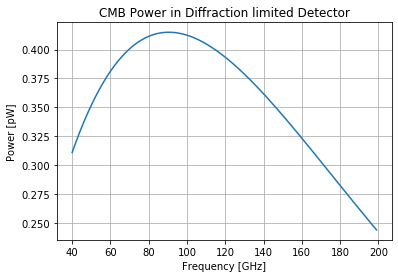

In [4]:
#Ploting CMB power

fig, ax = plt.subplots()
ax.plot(freq/1e9,P/1e-12)

ax.set(xlabel='Frequency [GHz]', ylabel='Power [pW]',
       title='CMB Power in Diffraction limited Detector')
ax.grid()

fig.savefig("CBM-POWER.pdf")
plt.show()

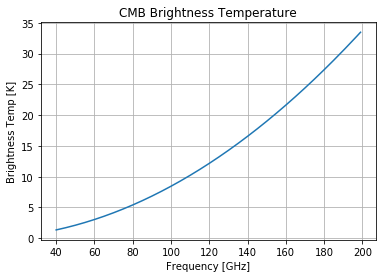

In [5]:
#Ploting CMB temp

fig, ax = plt.subplots()
ax.plot(freq/1e9,Tbx)

ax.set(xlabel='Frequency [GHz]', ylabel='Brightness Temp [K]',
       title='CMB Brightness Temperature')
ax.grid()

fig.savefig("CBM-TEMP.pdf")
plt.show()

In [6]:
T=P/(kb*freq*bwrel);                   #Brigness temperature

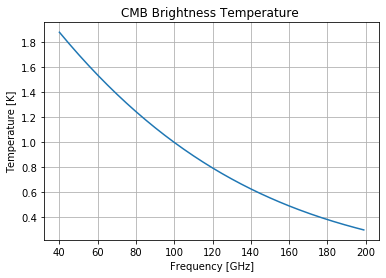

In [7]:
#Ploting Temperature

fig, ax = plt.subplots()
ax.plot(freq/1e9,T)

ax.set(xlabel='Frequency [GHz]', ylabel='Temperature [K]',
       title='CMB Brightness Temperature ')
ax.grid()

fig.savefig("CBM-B-TEMP.pdf")
plt.show()

In [8]:
# NEP Parameters
m=1;               #m=1 polarized detector,m=2 otherwise.
bw=bwrel*freq;     #Bandwidth.

In [9]:
# NEP Calculation
NEP=np.sqrt(2*h*freq*P+(2*P**2)/(m*bw));        #Noise Equivalent Power with bunching term
NEPpoisson=np.sqrt(2*h*freq*P);                 #Noise Equivalent Power Poisson only

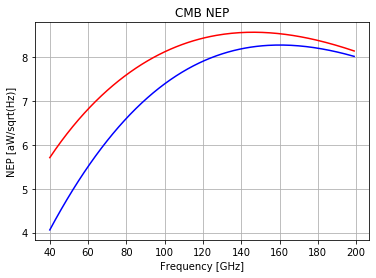

In [89]:
#Ploting NEP
fig, ax = plt.subplots()
ax.plot(freq/1e9,NEP/1e-18,'r')
ax.plot(freq/1e9,NEPpoisson/1e-18,'b')

ax.set(xlabel='Frequency [GHz]', ylabel='NEP [aW/sqrt(Hz)]',
       title='CMB NEP')
ax.grid()

fig.savefig("CBM-NEP.pdf")
plt.show()

In [90]:
#NET Calculation
F=((h*freq)/(kb*Tcmb))/(np.exp((h*freq)/(kb*Tcmb))-1);
NET=NEP/(kb*bw);                #Noise Equivalent Temperature
#NET=NEP/(P/Tb);                  #Noise Equivalent Temperature
NET10=NET/np.sqrt(10)
NET100=NET/np.sqrt(100)
NET1000=NET/np.sqrt(1000)

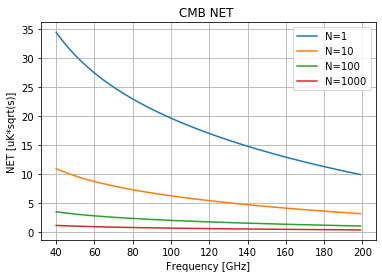

In [96]:
#Ploting Temperature

fig, ax = plt.subplots()
ax.plot(freq/1e9,NET/1e-6,freq/1e9,NET10/1e-6,freq/1e9,NET100/1e-6,freq/1e9,NET1000/1e-6)

ax.set(xlabel='Frequency [GHz]', ylabel='NET [uK*sqrt(s)]',
       title='CMB NET ')
ax.grid()
ax.legend(('N=1', 'N=10', 'N=100', 'N=1000'))


fig.savefig("CBM-NET.pdf")
plt.show()